In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pickle
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


from utils import *
from preprocess import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
train  = pd.read_csv('/content/train.csv')
val  = pd.read_csv('/content/val.csv')
test  = pd.read_csv('/content/test.csv')

In [ ]:
val.target.value_counts()

0    3503
1    1113
Name: target, dtype: int64

In [ ]:
test.shape

(3078, 2)

In [ ]:
test['target'].value_counts()

0    2336
1     742
Name: target, dtype: int64

In [ ]:
train.head()

,tweet,target,tweet2
0,"['all', 'responsible', 'for', 'the', 'chinese'...",1,"'all', 'responsible', 'for', 'the', 'chinese',..."
1,"['not', 'sexist', 'but', 'leave', 'some', 'gir...",1,"'not', 'sexist', 'but', 'leave', 'some', 'girl..."
2,"['whos', 'work', 'these', 'months', 'cover', '...",1,"'whos', 'work', 'these', 'months', 'cover', 's..."
3,"['mkr', 'why', 'all', 'these', 'people', 'want...",1,"'mkr', 'why', 'all', 'these', 'people', 'want'..."
4,"['how', 'about', 'you', 'unfollow', 'while', '...",1,"'how', 'about', 'you', 'unfollow', 'while', 'y..."


In [ ]:
train['target'].value_counts()

0    17514
1     5562
Name: target, dtype: int64

In [ ]:
initial = pd.read_csv('/content/combined_data2.csv')
initial.head()

,tweet,target
0,Drasko they didn't cook half a bird you idiot ...,1
1,Hopefully someone cooks Drasko in the next ep ...,1
2,of course you were born in serbia...you're as ...,1
3,These girls are the equivalent of the irritati...,1
4,RT @YesYoureRacist: At least you're only a tin...,1


In [ ]:
initial.shape

(30270, 2)

In [ ]:
initial['target'].value_counts()

0    23353
1     6917
Name: target, dtype: int64

In [ ]:
train['tweet'][0]

"['all', 'responsible', 'for', 'the', 'chinese', 'communist', 'party', 'chinese', 'virus']"

In [ ]:
def to_normal_string(text):
  text = text.split(', ')
  new = []
  for i in text:
    i =  i[1:-1]
    new.append(i)
  return " ".join(new)

In [ ]:
tweet3 = []
for item in train['tweet2']:
  tweet3.append(to_normal_string(item))

In [ ]:
train['tweet'] = tweet3

In [ ]:
train.head()

,tweet,target,tweet2
0,all responsible for the chinese communist part...,1,"'all', 'responsible', 'for', 'the', 'chinese',..."
1,not sexist but leave some girl write article e...,1,"'not', 'sexist', 'but', 'leave', 'some', 'girl..."
2,whos work these months cover shit for ccp chin...,1,"'whos', 'work', 'these', 'months', 'cover', 's..."
3,mkr why all these people want cook for live do...,1,"'mkr', 'why', 'all', 'these', 'people', 'want'..."
4,how about you unfollow while you be feminists ...,1,"'how', 'about', 'you', 'unfollow', 'while', 'y..."


In [ ]:
tweet3 = []
for item in val['tweet2']:
  tweet3.append(to_normal_string(item))
val['tweet'] = tweet3

In [ ]:
X_tr = train.tweet.values
X_val = val.tweet.values
y_tr = train.target.values
y_val = val.target.values

vec = TfidfVectorizer()
tfidf_tr = vec.fit_transform(X_tr)
tfidf_val = vec.transform(X_val)

## Modelling

Accuracy:  0.8641681109185442
F1 Score:  0.6112833230006199
ROC-AUC:  0.9103695997705984
Recall:  0.44294699011680144
Precision:  0.986
PR-AUC:  0.8465162401451213


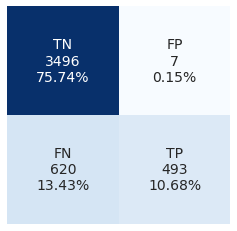

In [ ]:
nb = MultinomialNB().fit(tfidf_tr, y_tr)
y_pr_nb_val = nb.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_nb_val, nb)

Accuracy:  0.891681109185442
F1 Score:  0.7267759562841529
ROC-AUC:  0.940309923030933
Recall:  0.5974842767295597
Precision:  0.9274755927475593
PR-AUC:  0.8818287749061205


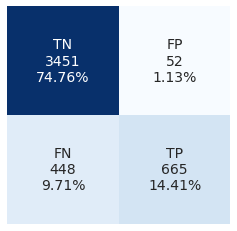

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(tfidf_tr, y_tr)
y_pr_rf_val = rf.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_rf_val, rf)

Accuracy:  0.915944540727903
F1 Score:  0.8036437246963564
ROC-AUC:  0.956498460182634
Recall:  0.7133872416891285
Precision:  0.9200463499420626
PR-AUC:  0.9163634046427973


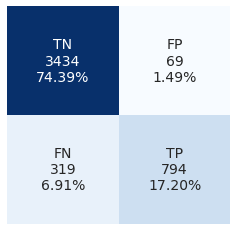

In [ ]:
log = LogisticRegression(random_state=42).fit(tfidf_tr, y_tr)
y_pr_log_val = log.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_log_val, log)

In [ ]:
svc = svm.LinearSVC(random_state=42).fit(tfidf_tr, y_tr)
y_pr_svc_val = svc.predict(tfidf_val)
get_metrics_2(tfidf_val, y_val, y_pr_svc_val, svc)


Accuracy:  0.9174610051993067
F1:  0.819002375296912
Recall:  0.7744833782569631
Precision:  0.8689516129032258
ROC-AUC:  0.952464695259281
PR-AUC:  0.908639746212112


Accuracy:  0.9053292894280762
F1 Score:  0.7865168539325843
ROC-AUC:  0.9509909231953411
Recall:  0.7232704402515723
Precision:  0.8618843683083511
PR-AUC:  0.8971269079861924


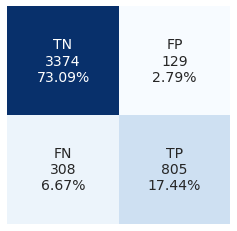

In [ ]:
abc = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    random_state=42
    ).fit(tfidf_tr, y_tr)
y_pr_abc_val = abc.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_abc_val, abc)

Accuracy:  0.8897313691507799
F1 Score:  0.7073030477285795
ROC-AUC:  0.942844395472601
Recall:  0.5525606469002695
Precision:  0.9824281150159745
PR-AUC:  0.8670790735522989


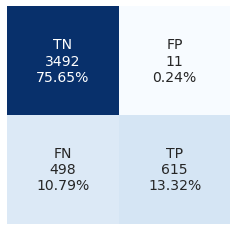

In [ ]:
gbc = GradientBoostingClassifier(random_state=42).fit(tfidf_tr, y_tr)
y_pr_gbc_val = gbc.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pr_gbc_val, gbc)

In [ ]:
data = {'Accuracy': [accuracy(y_val, y_pr_nb_val), 
                     accuracy(y_val, y_pr_rf_val), 
                     accuracy(y_val, y_pr_log_val), 
                     accuracy(y_val, y_pr_svc_val),
                     accuracy(y_val, y_pr_abc_val),
                     accuracy(y_val, y_pr_gbc_val)],
        'F1 Score': [f1(y_val, y_pr_nb_val), 
                     f1(y_val, y_pr_rf_val), 
                     f1(y_val, y_pr_log_val), 
                     f1(y_val, y_pr_svc_val),
                     f1(y_val, y_pr_abc_val),
                     f1(y_val, y_pr_gbc_val)],
        'Recall': [recall(y_val, y_pr_nb_val), 
                   recall(y_val, y_pr_rf_val), 
                   recall(y_val, y_pr_log_val),
                   recall(y_val, y_pr_svc_val),
                   recall(y_val, y_pr_abc_val),
                   recall(y_val, y_pr_gbc_val)],
        'Precision': [precision(y_val, y_pr_nb_val), 
                      precision(y_val, y_pr_rf_val), 
                      precision(y_val, y_pr_log_val),
                      precision(y_val, y_pr_svc_val),
                      precision(y_val, y_pr_abc_val),
                      precision(y_val, y_pr_gbc_val)],
        'ROC-AUC': [auc(tfidf_val, y_val, nb),
                    auc(tfidf_val, y_val, rf),
                    auc(tfidf_val, y_val, log),
                    auc2(tfidf_val, y_val, svc),
                    auc(tfidf_val, y_val, abc),
                    auc(tfidf_val, y_val, gbc)],
        'PR AUC': [aps(tfidf_val, y_val, nb),
                   aps(tfidf_val, y_val, rf),
                   aps(tfidf_val, y_val, log),
                   aps2(tfidf_val, y_val, svc),
                   aps(tfidf_val, y_val, abc),
                   aps(tfidf_val, y_val, gbc)]}
metrics5 = pd.DataFrame(data=data, index = ['Multinomial Naive Bayes', 
                                            'Random Forest',
                                            'Logistic Regression',
                                            'Support Vector Machine', 
                                            'AdaBoost Classifier', 
                                            'Gradient Boosting Classifier'])

In [ ]:
metrics5.to_csv("metrics_tfidf_base_val.csv")
metrics5

,Accuracy,F1 Score,Recall,Precision,ROC-AUC,PR AUC
Multinomial Naive Bayes,0.864168,0.611283,0.442947,0.986000,0.910370,0.846516
Random Forest,0.891681,0.726776,0.597484,0.927476,0.940310,0.881829
Logistic Regression,0.915945,0.803644,0.713387,0.920046,0.956498,0.916363
Support Vector Machine,0.917461,0.819002,0.774483,0.868952,0.952465,0.908640
AdaBoost Classifier,0.905329,0.786517,0.723270,0.861884,0.950991,0.897127
Gradient Boosting Classifier,0.889731,0.707303,0.552561,0.982428,0.942844,0.867079


In [ ]:
test.tweet

0                               just wan slit this throat
1       damn they get wifey fall back nigga dont share...
2       the mine place for woman work call sexist but ...
3         call sexist but when auto place rather talk guy
4       selfawareness critically low level not sexist ...
                              ...                        
3073          you owe two hoe dont wan hear shit when hyu
3074                       addict twitter just side bitch
3075    thats why youre good this game cause sit your ...
3076    dont give man the pussy until give you relatio...
3077    keep do your thing kid people why soon realize...
Name: tweet, Length: 3078, dtype: object

## TESTING

In [ ]:
tweet3 = []
for item in test['tweet']:
  tweet3.append(to_normal_string(item[1:-1]))
test['tweet'] = tweet3

In [ ]:
test.head()

,tweet,target
0,just wan slit this throat,1
1,damn they get wifey fall back nigga dont share...,1
2,the mine place for woman work call sexist but ...,1
3,call sexist but when auto place rather talk guy,1
4,selfawareness critically low level not sexist ...,1


In [ ]:
X_tt = test.tweet
y_tt = test.target
tfidf_tt = vec.transform(X_tt)

In [ ]:
y_pr_nb_tt = nb.predict(tfidf_tt)
y_pr_rf_tt = rf.predict(tfidf_tt)
y_pr_log_tt = log.predict(tfidf_tt)
y_pr_svc_tt = svc.predict(tfidf_tt)
y_pr_abc_tt = abc.predict(tfidf_tt)
y_pr_gbc_tt = gbc.predict(tfidf_tt)

Accuracy:  0.8635477582846004
F1 Score:  0.611111111111111
ROC-AUC:  0.8924558879186206
Recall:  0.444743935309973
Precision:  0.9763313609467456
PR-AUC:  0.8244027298506136


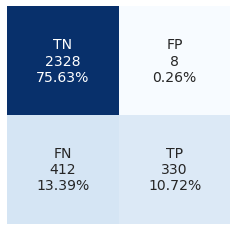

In [ ]:
get_metrics_confusion(tfidf_tt, y_tt, y_pr_nb_tt, nb)

Accuracy:  0.8827160493827161
F1 Score:  0.6984126984126985
ROC-AUC:  0.9228984741350663
Recall:  0.5633423180592992
Precision:  0.9186813186813186
PR-AUC:  0.8516790210051369


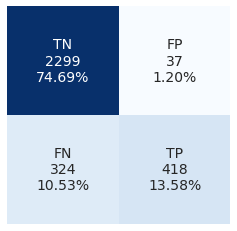

In [ ]:
get_metrics_confusion(tfidf_tt, y_tt, y_pr_rf_tt, rf)

Accuracy:  0.8927875243664717
F1 Score:  0.7433903576982893
ROC-AUC:  0.9327717687294612
Recall:  0.6442048517520216
Precision:  0.8786764705882353
PR-AUC:  0.8794233979851164


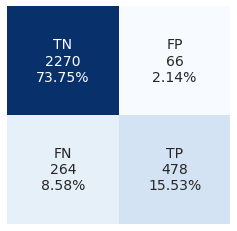

In [ ]:
get_metrics_confusion(tfidf_tt, y_tt, y_pr_log_tt, log)

In [ ]:
get_metrics_2(tfidf_tt, y_tt, y_pr_svc_tt, svc)

Accuracy:  0.9018843404808317
F1:  0.7792397660818714
Recall:  0.7183288409703504
Precision:  0.8514376996805112
ROC-AUC:  0.9325248426134475
PR-AUC:  0.8788894626897371


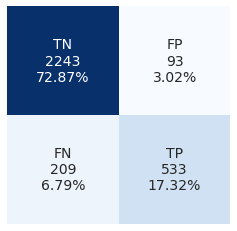

In [ ]:
get_confusion(y_tt, y_pr_svc_tt)

Accuracy:  0.8859649122807017
F1 Score:  0.7386448250186151
ROC-AUC:  0.9261517834065651
Recall:  0.6684636118598383
Precision:  0.8252911813643927
PR-AUC:  0.858931803502439


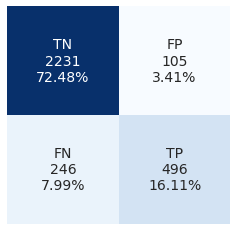

In [ ]:
get_metrics_confusion(tfidf_tt, y_tt, y_pr_abc_tt, abc)

Accuracy:  0.8784925276153346
F1 Score:  0.6736474694589878
ROC-AUC:  0.9211134521655652
Recall:  0.5202156334231806
Precision:  0.9554455445544554
PR-AUC:  0.8326781837922883


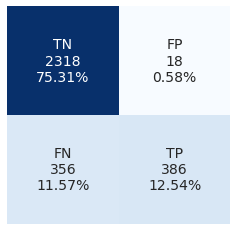

In [ ]:
get_metrics_confusion(tfidf_tt, y_tt, y_pr_gbc_tt, gbc)

In [ ]:
data6 = {'Accuracy': [accuracy(y_tt, y_pr_nb_tt), 
                      accuracy(y_tt, y_pr_rf_tt), 
                      accuracy(y_tt, y_pr_log_tt), 
                      accuracy(y_tt, y_pr_svc_tt),
                      accuracy(y_tt, y_pr_abc_tt),
                      accuracy(y_tt, y_pr_gbc_tt)],
        'F1 Score': [f1(y_tt, y_pr_nb_tt), 
                     f1(y_tt, y_pr_rf_tt), 
                     f1(y_tt, y_pr_log_tt), 
                     f1(y_tt, y_pr_svc_tt),
                     f1(y_tt, y_pr_abc_tt),
                     f1(y_tt, y_pr_gbc_tt)],
        'Recall': [recall(y_tt, y_pr_nb_tt), 
                   recall(y_tt, y_pr_rf_tt), 
                   recall(y_tt, y_pr_log_tt),
                   recall(y_tt, y_pr_svc_tt),
                   recall(y_tt, y_pr_abc_tt),
                   recall(y_tt, y_pr_gbc_tt)],
        'Precision': [precision(y_tt, y_pr_nb_tt), 
                      precision(y_tt, y_pr_rf_tt), 
                      precision(y_tt, y_pr_log_tt),
                      precision(y_tt, y_pr_svc_tt),
                      precision(y_tt, y_pr_abc_tt),
                      precision(y_tt, y_pr_gbc_tt)],
        'ROC-AUC': [auc(tfidf_tt, y_tt, nb),
                    auc(tfidf_tt, y_tt, rf),
                    auc(tfidf_tt, y_tt, log),
                    auc2(tfidf_tt, y_tt, svc),
                    auc(tfidf_tt, y_tt, abc),
                    auc(tfidf_tt, y_tt, gbc)],
        'PR AUC': [aps(tfidf_tt, y_tt, nb),
                   aps(tfidf_tt, y_tt, rf),
                   aps(tfidf_tt, y_tt, log),
                   aps2(tfidf_tt, y_tt, svc),
                   aps(tfidf_tt, y_tt, abc),
                   aps(tfidf_tt, y_tt, gbc)]}
metrics6 = pd.DataFrame(data=data6, index = ['Multinomial Naive Bayes', 
                                             'Random Forest',
                                             'Logistic Regression',
                                             'Support Vector Machine', 
                                             'AdaBoost Classifier', 
                                             'Gradient Boosting Classifier'])

In [ ]:
metrics6.to_csv("metrics_tfidf_base_test.csv")
metrics6

,Accuracy,F1 Score,Recall,Precision,ROC-AUC,PR AUC
Multinomial Naive Bayes,0.863548,0.611111,0.444744,0.976331,0.892456,0.824403
Random Forest,0.882716,0.698413,0.563342,0.918681,0.922898,0.851679
Logistic Regression,0.892788,0.743390,0.644205,0.878676,0.932772,0.879423
Support Vector Machine,0.901884,0.779240,0.718329,0.851438,0.932525,0.878889
AdaBoost Classifier,0.885965,0.738645,0.668464,0.825291,0.926152,0.858932
Gradient Boosting Classifier,0.878493,0.673647,0.520216,0.955446,0.921113,0.832678


## Hyperparameter Tuning

In [ ]:
logreg = LogisticRegression(random_state=42)
params = {'C': [0.001, 0.01, 0.1, 1, 10], 
          'penalty': ['l1', 'l2', 'elasticnet'],
          'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}
gslog = GridSearchCV(estimator = logreg,
                     param_grid = params,
                     cv = 10,
                     n_jobs = -1, 
                     verbose=3).fit(tfidf_tr, y_tr)
y_pred_gslog = gslog.predict(tfidf_val)
print("Best: %f using %s" % (gslog.best_score_, gslog.best_params_))

Fitting 10 folds for each of 75 candidates, totalling 750 fits
Best: 0.911466 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


Accuracy:  0.917894280762565
F1 Score:  0.8206341694273546
ROC-AUC:  0.9546612465916136
Recall:  0.7789757412398922
Precision:  0.867
PR-AUC:  0.9117582700054967


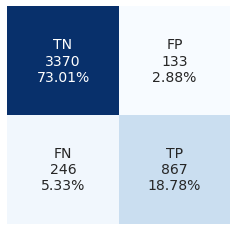

In [ ]:
get_metrics_confusion(tfidf_test, y_test, y_pred_gslog, gslog)

Accuracy:  0.917894280762565
F1 Score:  0.8206341694273546
ROC-AUC:  0.9546612465916136
Recall:  0.7789757412398922
Precision:  0.867
PR-AUC:  0.9117582700054967


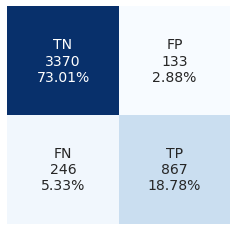

In [ ]:
log_best = LogisticRegression(random_state=42, 
                              C=10, 
                              penalty='l2', 
                              solver='liblinear').fit(tfidf_tr, y_tr)
y_pred_log_best = log_best.predict(tfidf_val)
get_metrics_confusion(tfidf_test, y_test, y_pred_log_best, log_best)

In [ ]:
rfc = RandomForestClassifier(random_state=42)
params = {'n_estimators': [50, 100, 200, 400, 600, 800, 1000]}
gsrfc = GridSearchCV(estimator = rfc,
                     param_grid = params,
                     cv = 5,
                     verbose=2)
gsrfc.fit(tfidf_tr, y_tr)
y_pred_gsrfc = gsrfc.predict(tfidf_val)
print("Best: %f using %s" % (gsrfc.best_score_, gsrfc.best_params_))


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ....................................n_estimators=50; total time=  18.0s
[CV] END ....................................n_estimators=50; total time=  20.3s
[CV] END ....................................n_estimators=50; total time=  23.9s
[CV] END ....................................n_estimators=50; total time=  21.3s
[CV] END ....................................n_estimators=50; total time=  17.9s
[CV] END ...................................n_estimators=100; total time=  37.1s
[CV] END ...................................n_estimators=100; total time=  37.4s
[CV] END ...................................n_estimators=100; total time=  37.6s
[CV] END ...................................n_estimators=100; total time=  36.7s
[CV] END ...................................n_estimators=100; total time=  36.4s
[CV] END ...................................n_estimators=200; total time= 1.2min
[CV] END ...................................n_est

In [ ]:
rfc = RandomForestClassifier(random_state=42)
params = {'n_estimators': [500, 1000, 2000]}
gsrfc = GridSearchCV(estimator = rfc,
                     param_grid = params,
                     cv = 5,
                     verbose=2)
gsrfc.fit(tfidf_tr, y_tr)
y_pred_gsrfc = gsrfc.predict(tfidf_val)
print("Best: %f using %s" % (gsrfc.best_score_, gsrfc.best_params_))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ...................................n_estimators=500; total time= 3.2min
[CV] END ...................................n_estimators=500; total time= 3.1min
[CV] END ...................................n_estimators=500; total time= 3.1min
[CV] END ...................................n_estimators=500; total time= 3.1min
[CV] END ...................................n_estimators=500; total time= 3.1min
[CV] END ..................................n_estimators=1000; total time= 6.2min
[CV] END ..................................n_estimators=1000; total time= 6.2min
[CV] END ..................................n_estimators=1000; total time= 6.2min
[CV] END ..................................n_estimators=1000; total time= 6.2min
[CV] END ..................................n_estimators=1000; total time= 6.1min
[CV] END ..................................n_estimators=2000; total time=12.3min
[CV] END ..................................n_esti

In [ ]:
rfc = RandomForestClassifier(random_state=42)
params = {'n_estimators': [500],
          'max_depth': [500, 1000, 1500, 2000],
         }
gsrfc = GridSearchCV(estimator = rfc,
                     param_grid = params,
                     cv = 5,
                     verbose=2)
gsrfc.fit(tfidf_tr, y_tr)
y_pred_gsrfc = gsrfc.predict(tfidf_val)
print("Best: %f using %s" % (gsrfc.best_score_, gsrfc.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....................max_depth=500, n_estimators=500; total time= 3.4min
[CV] END ....................max_depth=500, n_estimators=500; total time= 3.0min
[CV] END ....................max_depth=500, n_estimators=500; total time= 3.0min
[CV] END ....................max_depth=500, n_estimators=500; total time= 3.1min
[CV] END ....................max_depth=500, n_estimators=500; total time= 3.0min
[CV] END ...................max_depth=1000, n_estimators=500; total time= 3.1min
[CV] END ...................max_depth=1000, n_estimators=500; total time= 3.1min
[CV] END ...................max_depth=1000, n_estimators=500; total time= 3.1min
[CV] END ...................max_depth=1000, n_estimators=500; total time= 3.1min
[CV] END ...................max_depth=1000, n_estimators=500; total time= 3.1min
[CV] END ...................max_depth=1500, n_estimators=500; total time= 3.1min
[CV] END ...................max_depth=1500, n_est

In [ ]:
rfc = RandomForestClassifier(random_state=42)
params = {'n_estimators': [500],
          'max_depth': [500], 
          'min_samples_leaf': [1, 2, 4]
         }
gsrfc = GridSearchCV(estimator = rfc,
                     param_grid = params,
                     cv = 5,
                     verbose=2)
gsrfc.fit(tfidf_tr, y_tr)
y_pred_gsrfc = gsrfc.predict(tfidf_val)
print("Best: %f using %s" % (gsrfc.best_score_, gsrfc.best_params_))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END max_depth=500, min_samples_leaf=1, n_estimators=500; total time= 3.2min
[CV] END max_depth=500, min_samples_leaf=1, n_estimators=500; total time= 3.0min
[CV] END max_depth=500, min_samples_leaf=1, n_estimators=500; total time= 3.0min
[CV] END max_depth=500, min_samples_leaf=1, n_estimators=500; total time= 3.1min
[CV] END max_depth=500, min_samples_leaf=1, n_estimators=500; total time= 3.0min
[CV] END max_depth=500, min_samples_leaf=2, n_estimators=500; total time= 1.9min
[CV] END max_depth=500, min_samples_leaf=2, n_estimators=500; total time= 1.7min
[CV] END max_depth=500, min_samples_leaf=2, n_estimators=500; total time= 1.7min
[CV] END max_depth=500, min_samples_leaf=2, n_estimators=500; total time= 1.7min
[CV] END max_depth=500, min_samples_leaf=2, n_estimators=500; total time= 1.7min
[CV] END max_depth=500, min_samples_leaf=4, n_estimators=500; total time= 1.2min
[CV] END max_depth=500, min_samples_leaf=4, n_est

In [ ]:
rfc = RandomForestClassifier(random_state=42)
params = {'n_estimators': [500],
          'max_depth': [500], 
          'min_samples_leaf': [1], 
          'min_samples_split': [2, 5, 10]
         }
gsrfc = GridSearchCV(estimator = rfc,
                     param_grid = params,
                     cv = 5,
                     verbose=2)
gsrfc.fit(tfidf_tr, y_tr)
y_pred_gsrfc = gsrfc.predict(tfidf_val)
print("Best: %f using %s" % (gsrfc.best_score_, gsrfc.best_params_))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END max_depth=500, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 3.1min
[CV] END max_depth=500, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 3.0min
[CV] END max_depth=500, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 3.0min
[CV] END max_depth=500, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 3.0min
[CV] END max_depth=500, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 3.0min
[CV] END max_depth=500, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time= 2.7min
[CV] END max_depth=500, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time= 2.7min
[CV] END max_depth=500, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time= 2.6min
[CV] END max_depth=500, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time= 2.7min
[CV] END max_depth=500

In [ ]:
rfc_best = RandomForestClassifier(random_state=42, 
                                  max_depth=500, 
                                  min_samples_leaf=1,
                                  min_samples_split=2, 
                                  n_estimators=500)
rfc_best.fit(tfidf_tr, y_tr)
y_pred_rfc_best = rfc_best.predict(tfidf_test)

Accuracy:  0.895363951473137
F1 Score:  0.7312186978297163
ROC-AUC:  0.9417777959028316
Recall:  0.5902964959568733
Precision:  0.9605263157894737
PR-AUC:  0.8908554085255811


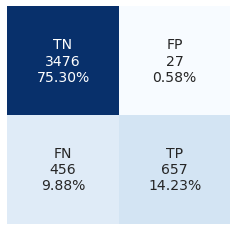

In [ ]:
get_metrics_confusion(tfidf_test, y_test, y_pred_rfc_best, rfc_best)

In [ ]:
from sklearn.svm import SVC
svm = SVC()
params_grid = {'C': [0.1, 1, 10, 100]}
gssvm = GridSearchCV(SVC(),
                     params_grid,
                     refit = True,
                     verbose = 2)
gssvm.fit(tfidf_tr, y_tr)
y_pred_gssvm = gssvm.predict(tfidf_val)  
print("Best: %f using %s" % (gssvm.best_score_, gssvm.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=  27.5s
[CV] END ..............................................C=0.1; total time=  27.7s
[CV] END ..............................................C=0.1; total time=  27.1s
[CV] END ..............................................C=0.1; total time=  27.5s
[CV] END ..............................................C=0.1; total time=  27.3s
[CV] END ................................................C=1; total time= 1.0min
[CV] END ................................................C=1; total time= 1.0min
[CV] END ................................................C=1; total time= 1.0min
[CV] END ................................................C=1; total time= 1.0min
[CV] END ................................................C=1; total time= 1.0min
[CV] END ...............................................C=10; total time= 1.3min
[CV] END ........................................

In [ ]:
svm = SVC()
params_grid = {'C': [10],
               'gamma': [1, 0.1, 0.01, 0.001]}
gssvm = GridSearchCV(SVC(),
                     params_grid, 
                     refit = True, 
                     verbose = 2)
gssvm.fit(tfidf_tr, y_tr)
y_pred_gssvm = gssvm.predict(tfidf_val)  
print("Best: %f using %s" % (gssvm.best_score_, gssvm.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ......................................C=10, gamma=1; total time= 1.3min
[CV] END ......................................C=10, gamma=1; total time= 1.3min
[CV] END ......................................C=10, gamma=1; total time= 1.3min
[CV] END ......................................C=10, gamma=1; total time= 1.3min
[CV] END ......................................C=10, gamma=1; total time= 1.3min
[CV] END ....................................C=10, gamma=0.1; total time=  37.5s
[CV] END ....................................C=10, gamma=0.1; total time=  37.8s
[CV] END ....................................C=10, gamma=0.1; total time=  36.7s
[CV] END ....................................C=10, gamma=0.1; total time=  37.1s
[CV] END ....................................C=10, gamma=0.1; total time=  37.1s
[CV] END ...................................C=10, gamma=0.01; total time=  20.2s
[CV] END ...................................C=10,

In [ ]:
svm = SVC()
params_grid = {'C': [10],
               'gamma': [0.1],
               'kernel': ['rbf', 'poly', 'sigmoid']}
gssvm = GridSearchCV(SVC(),
                     params_grid, 
                     refit = True, 
                     verbose = 2)
gssvm.fit(tfidf_tr, y_tr)
y_pred_gssvm = gssvm.predict(tfidf_val)  
print("Best: %f using %s" % (gssvm.best_score_, gssvm.best_params_))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  32.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  32.3s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  31.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  33.3s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  32.2s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=  51.7s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=  51.7s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=  50.8s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=  50.8s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=  51.4s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=  22.6s
[CV] END ....................C=10, gamma=0.1, ker

In [ ]:
get_metrics_2(tfidf_val, y_val, y_pred_gssvm, gssvm)

Accuracy:  0.9222270363951474
F1:  0.8286396181384249
Recall:  0.779874213836478
Precision:  0.8839103869653768
ROC-AUC:  0.9545535222152031
PR-AUC:  0.9165493166441882


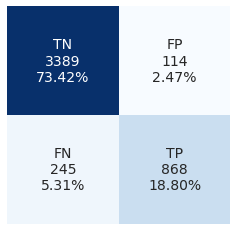

In [ ]:
get_confusion(y_test, y_pred_gssvm)

Accuracy:  0.9222270363951474
F1:  0.8286396181384249
Recall:  0.779874213836478
Precision:  0.8839103869653768
ROC-AUC:  0.9545535222152031
PR-AUC:  0.9165493166441882


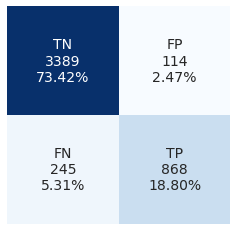

In [ ]:
svm_best = SVC(C=10, gamma=0.1, kernel='rbf').fit(tfidf_tr, y_tr)
y_pred_svm_best = svm_best.predict(tfidf_val)
get_metrics_2(tfidf_test, y_test, y_pred_svm_best, svm_best)
get_confusion(y_test, y_pred_svm_best)

In [ ]:
data7 = {'Accuracy': [accuracy(y_val, y_pred_log_best),
                      accuracy(y_val, y_pred_rfc_best),
                      accuracy(y_val, y_pred_svm_best)],
        'F1 Score': [f1(y_val, y_pred_log_best),
                     f1(y_val, y_pred_rfc_best),
                     f1(y_val, y_pred_svm_best)],
        'Recall': [recall(y_val, y_pred_log_best),
                   recall(y_val, y_pred_rfc_best),
                   recall(y_val, y_pred_svm_best)],
        'Precision': [precision(y_val, y_pred_log_best),
                      precision(y_val, y_pred_rfc_best),
                      precision(y_val, y_pred_svm_best)],
        'ROC-AUC': [auc(tfidf_val, y_val, log_best),
                    auc(tfidf_val, y_val, rfc_best),
                    auc2(tfidf_val, y_val, svm_best)],
        'PR AUC': [aps(tfidf_val, y_val, log_best),
                   aps(tfidf_val, y_val, rfc_best),
                   aps2(tfidf_val, y_val, svm_best)]}
metrics7 = pd.DataFrame(data=data7, index=['Logistic Regression w/GridsearchCV',
                                           'Random Forest w/GridsearchCV',
                                           'Support Vector Machine w/GridsearchCV'])

In [ ]:
metrics7.to_csv("metrics_tfidf_tuned_test.csv")
metrics7

,Accuracy,F1 Score,Recall,Precision,ROC-AUC,PR AUC
Logistic Regression w/GridsearchCV,0.917894,0.820634,0.778976,0.867000,0.954661,0.911758
Random Forest w/GridsearchCV,0.895364,0.731219,0.590296,0.960526,0.941778,0.890855
Support Vector Machine w/GridsearchCV,0.922227,0.828640,0.779874,0.883910,0.954554,0.916549


val->test